In [1]:
import sys
sys.path.append('/root/userspace/assignment/dl4us/src')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from time import time

import dataset
from cluster import Cluster, AutoEncoder
from dec import DEC
from vade import VaDE

# Fashion MNIST

In [2]:
x_train, y_train = dataset.load()
print('Shape of x_train:', x_train.shape)
print('Shape of y_train:', y_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
Shape of x_train: (70000, 28, 28, 1)
Shape of y_train: (70000,)


## k-means

In [12]:
kmeans = Cluster()
scores = kmeans.fit(x_train.reshape((len(x_train), -1)), y_train, verbose=0)
scores

{'acc': 0.47582857142857143,
 'nmi': 0.5123940556025235,
 'ari': 0.3485597514259993}

## AutoEncoder + k-means

In [4]:
autoencoder = AutoEncoder()
scores = autoencoder.fit(x_train.reshape((len(x_train), -1)), y_train, verbose=0)
scores

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


{'acc': 0.5479428571428572,
 'nmi': 0.554859288255856,
 'ari': 0.4042170105352074}

## DEC

In [5]:
dec = DEC(dims=(784, 500, 500, 2000, 10), pretrain_epochs=300)
scores = dec.fit(x_train.reshape((len(x_train), -1)), y_train, verbose=0)
scores

Instructions for updating:
Use tf.cast instead.


{'acc': 0.5885857142857143,
 'nmi': 0.6310655050526034,
 'ari': 0.4649262498050453}

## VaDE

In [73]:
vade = VaDE(
    n_clusters=10, input_dim = 784, hidden_dim = [500, 500, 2000], latent_dim = 10,
    act='relu', epochs=100, pretrain_epochs=100, batch_size=200, lr=0.002,
)
scores = vade.fit(x_train.reshape((len(x_train), -1)), y_train, verbose=0)
scores

{'acc': 0.6674285714285715,
 'nmi': 0.6480924415707393,
 'ari': 0.5175269492717985}

## Visualization

In [7]:
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
#import seaborn as sns

classes = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot',
]

def plot_confusion_matrix(cm, classes):
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    #plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

[[1814 3490    3  164    0   36  606   28   92  767]
 [ 161    9    0   77    0    0  141    3 6145  464]
 [2124   46    1 4119    0   29  512   33    7  129]
 [ 665   76    0   77    1    6  532    6 2730 2907]
 [1168    6    0 4280    0   31  265   20   80 1150]
 [  53    0 1707    0  565   12 4644   14    0    5]
 [2471  739    6 2276    2   17  791   77   38  583]
 [   1    0 5950    0  340    0  703    6    0    0]
 [ 326    8  351  332    9 2833  530 2552   18   41]
 [  66    1  782   11 5882    5  231    7    2   13]]


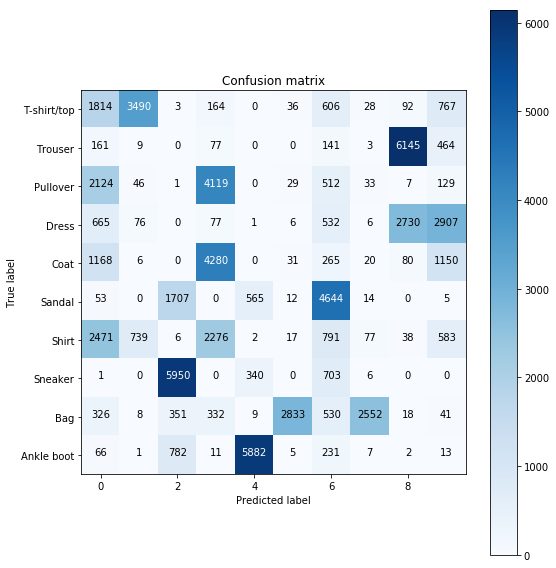

In [8]:
y_pred = kmeans.predict(x_train.reshape((len(x_train), -1)))

cnf_matrix = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes)

[[4645    9   10   16    0   62  237 1362  413  246]
 [  20    0   14    0    0 6307  317  132  179   31]
 [  44    4 3017    3    0    2  166 2008    9 1747]
 [ 297    0   10    3    2  221 1659  529 4226   53]
 [   8    3 3934   24    1   46 1589  727   24  644]
 [  14 4283    0    2 1660   65    0  963    7    6]
 [1299   12 1884    4    2   27  481 2159  122 1010]
 [   0 6716    0    0  268    0    0   16    0    0]
 [  20 1169   14 2994   70    6   46  376  109 2196]
 [   5 1322    0    0 5626    1    1   38    2    5]]


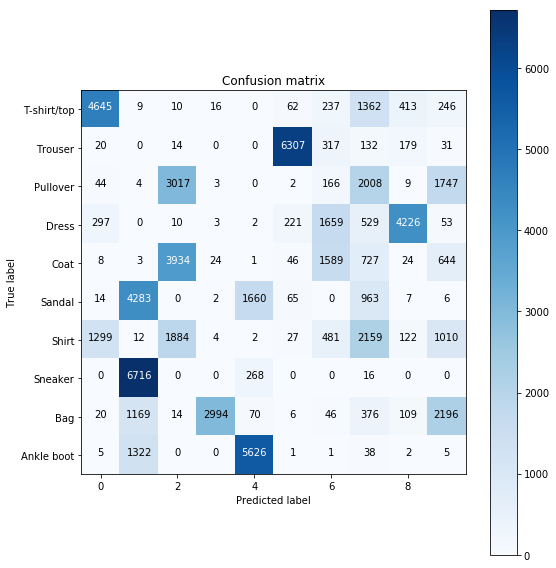

In [9]:
y_pred = autoencoder.predict(x_train.reshape((len(x_train), -1)))

cnf_matrix = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes)

[[5511    0   93    1  955  141   27  266    4    2]
 [   5    0   81    0  246    7    0   94    2 6565]
 [  39    0 2176    0   83  122    4 4573    1    2]
 [ 250    0  616    0 6007   25    7   74    0   21]
 [  13    0 3982    0  701   32   16 2251    1    4]
 [   0 3292    1 1563    8   35    2    0 2099    0]
 [1517    0 2231    0  703  312   11 2222    1    3]
 [   0 5375    0 1575    0    7    1    0   42    0]
 [  17   27   38   15  124 3337 3346   87    7    2]
 [   0  106    1 3431    2    2    0    1 3457    0]]


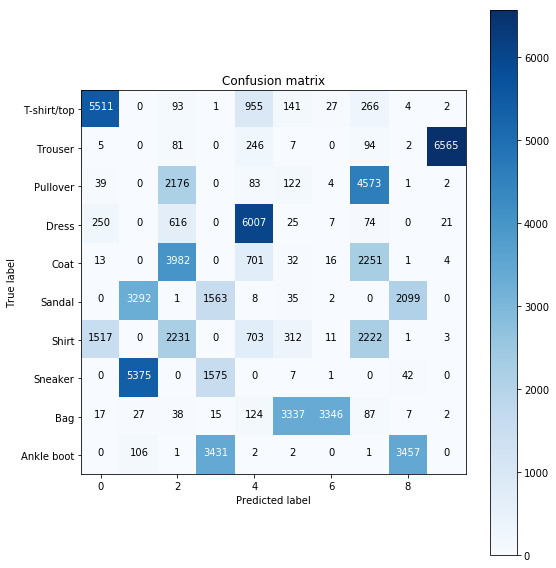

In [10]:
y_pred = dec.predict(x_train.reshape((len(x_train), -1)))

cnf_matrix = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes)

[[  93    1 1057   17    0  159  234   38    1 5400]
 [  30    0  238   12    0   13  102    5 6600    0]
 [ 613    0   41 3549    0   96 2655   18    0   28]
 [2107    0 4375    2    0   31  233   10    5  237]
 [2513    0   34 3280    0   59 1093   12    2    7]
 [   0 3440    4    0   75   27    0 3454    0    0]
 [ 841    0  757 1006    0  256 2683   20    1 1436]
 [   0 5942    0    0  943    8    0  107    0    0]
 [  30   24  923    4    3 5904   63   44    0    5]
 [   0  338    4    0 6306    7    0  345    0    0]]


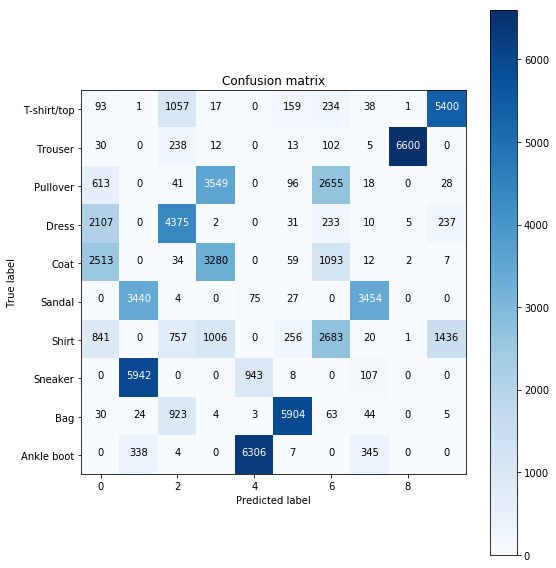

In [82]:
y_pred = vade.predict(x_train.reshape((len(x_train), -1)))

cnf_matrix = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes)

In [63]:
def plot_mnist(images, dim=(1,10), figsize=(12,2)):
    assert len(images) == 10, 'Images size must be 10.'
    plt.figure(figsize=figsize)
    for i in range(len(images)):
        plt.subplot(dim[0],dim[1],i+1)
        img = images[i,:,:, 0]
        plt.imshow(img, cmap='binary')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

## DEC

In [15]:
y_pred = dec.predict(x_train.reshape((len(x_train), -1)))

### Bag

3337


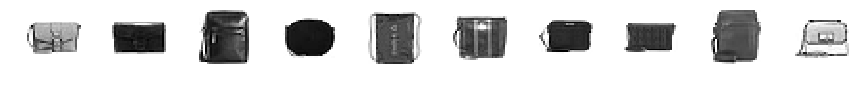

3346


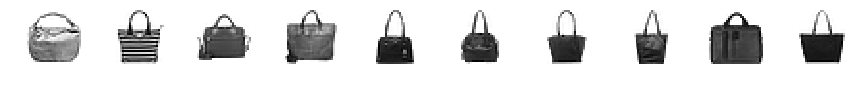

In [69]:
target = np.where((y_train == 8) & (y_pred == 5))
print(len(target[0]))
images = x_train[np.random.choice(target[0], 10, replace=False)]
plot_mnist(images)

target = np.where((y_train == 8) & (y_pred == 6))
print(len(target[0]))
images = x_train[np.random.choice(target[0], 10, replace=False)]
plot_mnist(images)

### Coat

3982


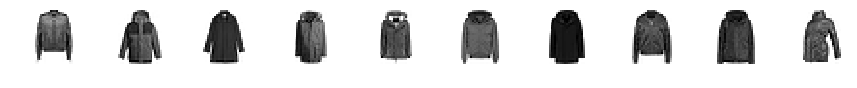

2251


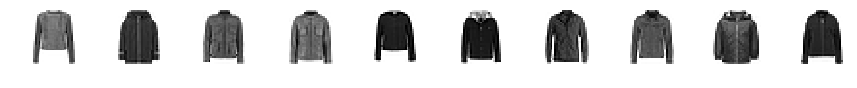

In [72]:
target = np.where((y_train == 4) & (y_pred == 2))
print(len(target[0]))
images = x_train[np.random.choice(target[0], 10, replace=False)]
plot_mnist(images)

target = np.where((y_train == 4) & (y_pred == 7))
print(len(target[0]))
images = x_train[np.random.choice(target[0], 10, replace=False)]
plot_mnist(images)

### Pullover

2176


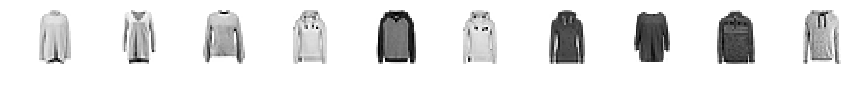

4573


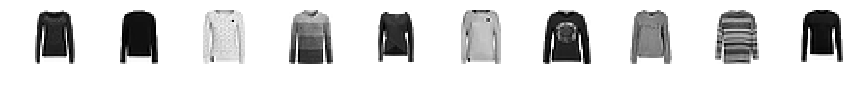

In [74]:
target = np.where((y_train == 2) & (y_pred == 2))
print(len(target[0]))
images = x_train[np.random.choice(target[0], 10, replace=False)]
plot_mnist(images)

target = np.where((y_train == 2) & (y_pred == 7))
print(len(target[0]))
images = x_train[np.random.choice(target[0], 10, replace=False)]
plot_mnist(images)

### Shirt

2231


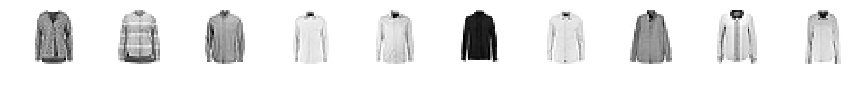

2222


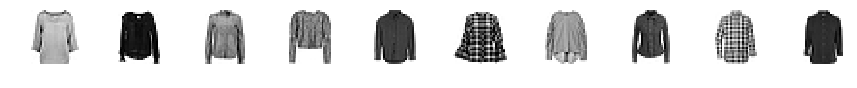

In [75]:
target = np.where((y_train == 6) & (y_pred == 2))
print(len(target[0]))
images = x_train[np.random.choice(target[0], 10, replace=False)]
plot_mnist(images)

target = np.where((y_train == 6) & (y_pred == 7))
print(len(target[0]))
images = x_train[np.random.choice(target[0], 10, replace=False)]
plot_mnist(images)

### Sandal

3292


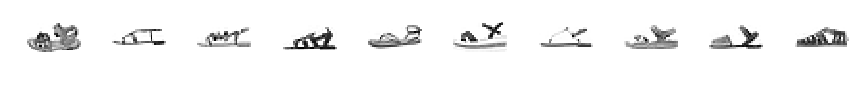

1563


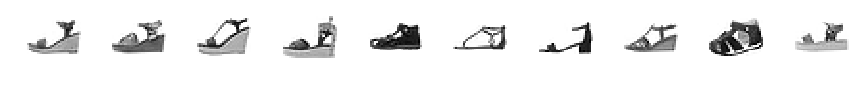

2099


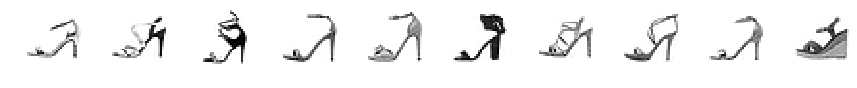

In [76]:
target = np.where((y_train == 5) & (y_pred == 1))
print(len(target[0]))
images = x_train[np.random.choice(target[0], 10, replace=False)]
plot_mnist(images)

target = np.where((y_train == 5) & (y_pred == 3))
print(len(target[0]))
images = x_train[np.random.choice(target[0], 10, replace=False)]
plot_mnist(images)

target = np.where((y_train == 5) & (y_pred == 8))
print(len(target[0]))
images = x_train[np.random.choice(target[0], 10, replace=False)]
plot_mnist(images)

5375


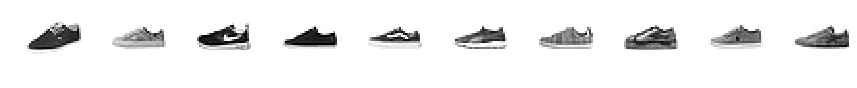

1575


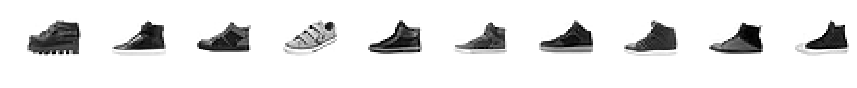

42


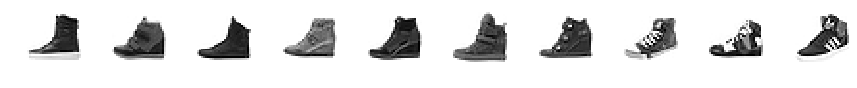

In [77]:
target = np.where((y_train == 7) & (y_pred == 1))
print(len(target[0]))
images = x_train[np.random.choice(target[0], 10, replace=False)]
plot_mnist(images)

target = np.where((y_train == 7) & (y_pred == 3))
print(len(target[0]))
images = x_train[np.random.choice(target[0], 10, replace=False)]
plot_mnist(images)

target = np.where((y_train == 7) & (y_pred == 8))
print(len(target[0]))
images = x_train[np.random.choice(target[0], 10, replace=False)]
plot_mnist(images)

106


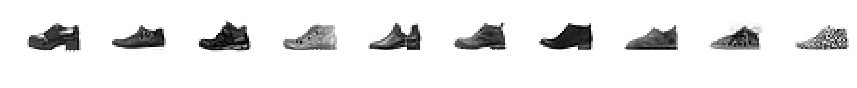

3431


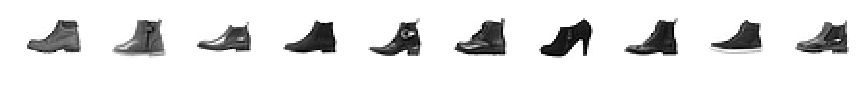

3457


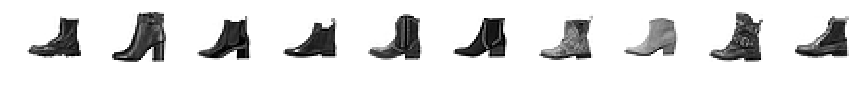

In [78]:
target = np.where((y_train == 9) & (y_pred == 1))
print(len(target[0]))
images = x_train[np.random.choice(target[0], 10, replace=False)]
plot_mnist(images)

target = np.where((y_train == 9) & (y_pred == 3))
print(len(target[0]))
images = x_train[np.random.choice(target[0], 10, replace=False)]
plot_mnist(images)

target = np.where((y_train == 9) & (y_pred == 8))
print(len(target[0]))
images = x_train[np.random.choice(target[0], 10, replace=False)]
plot_mnist(images)

## VaDE

In [80]:
y_pred = vade.predict(x_train.reshape((len(x_train), -1)))

### Dress

2107


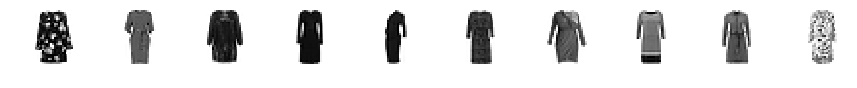

4375


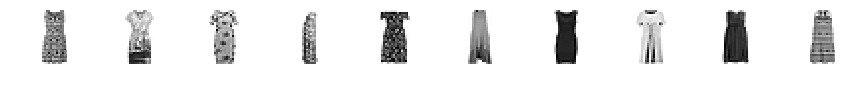

In [84]:
target = np.where((y_train == 3) & (y_pred == 0))
print(len(target[0]))
images = x_train[np.random.choice(target[0], 10, replace=False)]
plot_mnist(images)

target = np.where((y_train == 3) & (y_pred == 2))
print(len(target[0]))
images = x_train[np.random.choice(target[0], 10, replace=False)]
plot_mnist(images)

### Sandal

3440


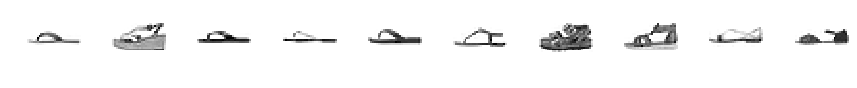

3454


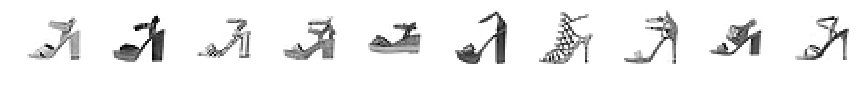

In [85]:
target = np.where((y_train == 5) & (y_pred == 1))
print(len(target[0]))
images = x_train[np.random.choice(target[0], 10, replace=False)]
plot_mnist(images)

target = np.where((y_train == 5) & (y_pred == 7))
print(len(target[0]))
images = x_train[np.random.choice(target[0], 10, replace=False)]
plot_mnist(images)

### Pullover

3549


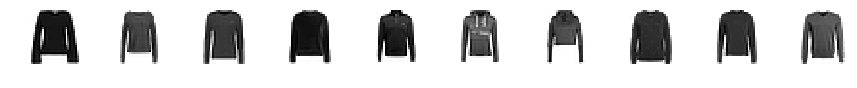

2655


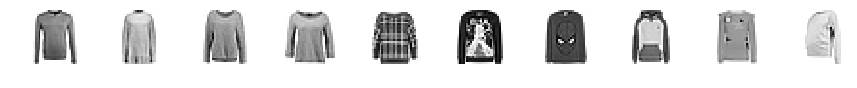

In [86]:
target = np.where((y_train == 2) & (y_pred == 3))
print(len(target[0]))
images = x_train[np.random.choice(target[0], 10, replace=False)]
plot_mnist(images)

target = np.where((y_train == 2) & (y_pred == 6))
print(len(target[0]))
images = x_train[np.random.choice(target[0], 10, replace=False)]
plot_mnist(images)

### Coat

3280


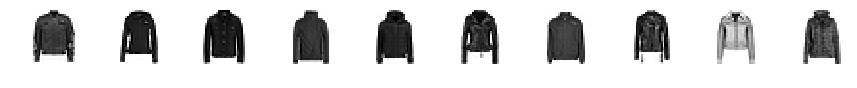

1093


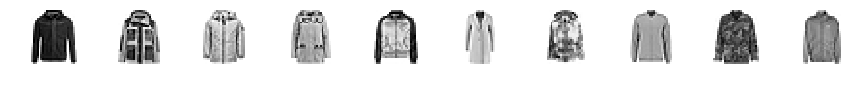

In [87]:
target = np.where((y_train == 4) & (y_pred == 3))
print(len(target[0]))
images = x_train[np.random.choice(target[0], 10, replace=False)]
plot_mnist(images)

target = np.where((y_train == 4) & (y_pred == 6))
print(len(target[0]))
images = x_train[np.random.choice(target[0], 10, replace=False)]
plot_mnist(images)

### Shirt

1006


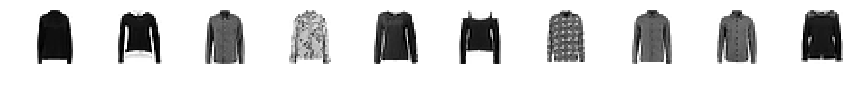

2683


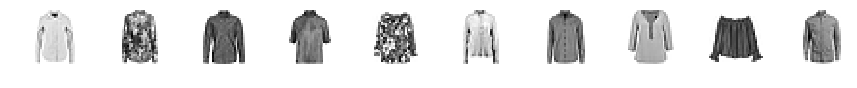

In [88]:
target = np.where((y_train == 6) & (y_pred == 3))
print(len(target[0]))
images = x_train[np.random.choice(target[0], 10, replace=False)]
plot_mnist(images)

target = np.where((y_train == 6) & (y_pred == 6))
print(len(target[0]))
images = x_train[np.random.choice(target[0], 10, replace=False)]
plot_mnist(images)